<a href="https://colab.research.google.com/github/Miragecore/SandBox/blob/main/ACVNet_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.python.org/ftp/python/3.8.12/Python-3.8.12.tgz
!tar xvfz Python-3.8.12.tgz
!Python-3.8.12/configure
!make
!sudo make install


In [2]:
!git clone https://github.com/gangweiX/ACVNet.git

Cloning into 'ACVNet'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 173 (delta 80), reused 48 (delta 13), pack-reused 0
Receiving objects: 100% (173/173), 139.60 MiB | 35.53 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [3]:
%cd ACVNet

/content/ACVNet


In [4]:
from models import __models__, model_loss_train_attn_only, model_loss_train_freeze_attn, model_loss_train, model_loss_test
import torch.nn as nn
import torch.nn.parallel

In [ ]:
model = __models__['acvnet'](192, False, False)
model = nn.DataParallel(model)
model.cuda()

In [ ]:
checkpoint = torch.load('./pretrained_model/pretrained_model_sceneflow.ckpt')
print(checkpoint.keys())
model.load_state_dict(checkpoint['model'])

In [7]:
from PIL import Image
import PIL
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [8]:
def predict(left, right, crops=(0,0,1232,368)):
  left_img = Image.open(left).convert('RGB')
  right_img = Image.open(right).convert('RGB')

  left_img = left_img.crop(crops)
  right_img = right_img.crop(crops)

  tf = transforms.ToTensor()
  left_img = tf(left_img).unsqueeze(0)
  right_img = tf(right_img).unsqueeze(0)

  return model(left_img, right_img)

def show_tensor(tensor, fs=(16,12)):
    for i in range(len(tensor)):
      print('stage ' + str(i+1))
      img = tensor[i].detach().cpu().numpy() # tensor -> numpy
      img = img.squeeze()
      fig = plt.figure(figsize=fs)
      plt.imshow(img)
      plt.show()

In [ ]:
!wget https://github.com/Miragecore/cando/raw/iss9/sample/frame0001.jpg
!wget https://github.com/Miragecore/cando/raw/iss9/sample/frame0002.jpg

In [10]:
import gc
gc.collect()
torch.cuda.empty_cache()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


stage 1


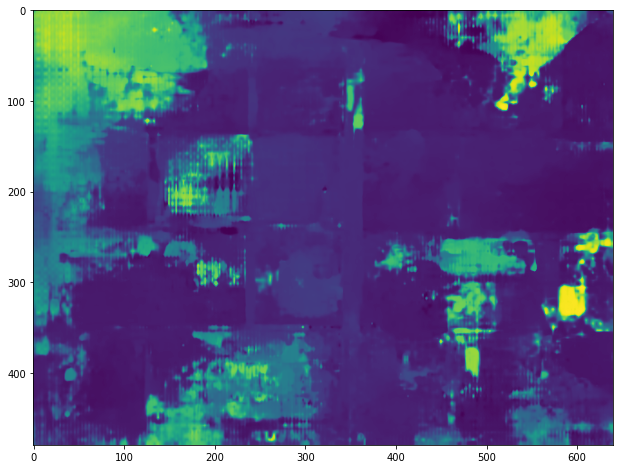

stage 2


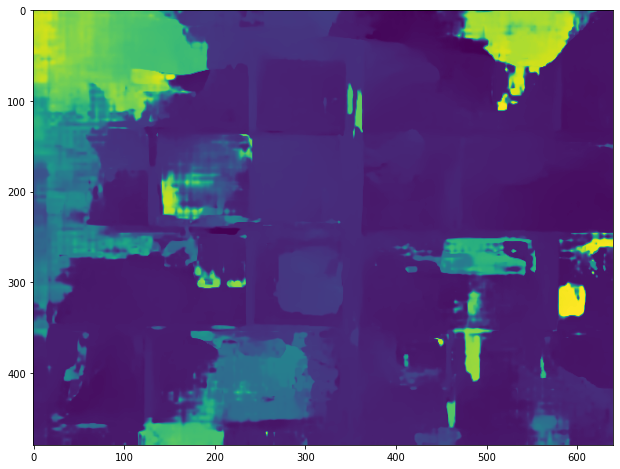

stage 3


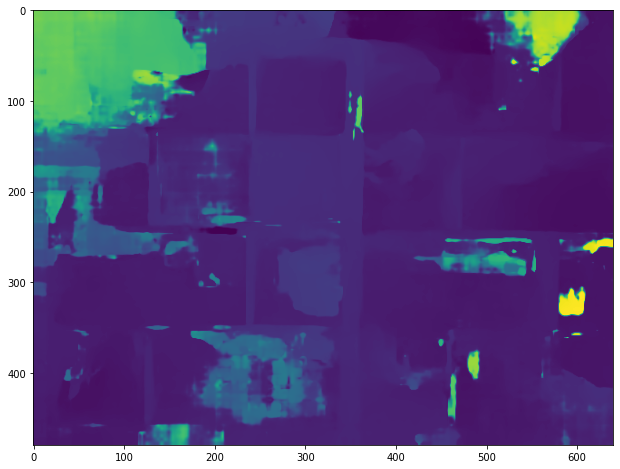

stage 4


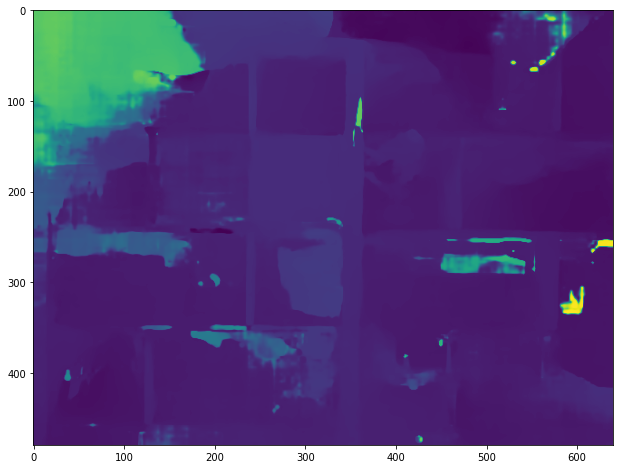

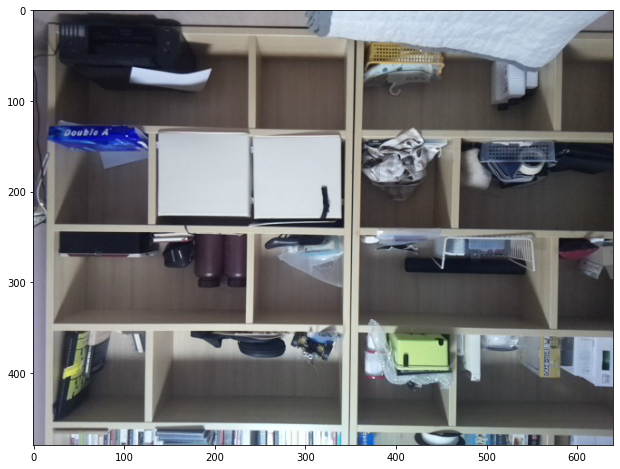

In [11]:


left = './frame0002.jpg'
right = './frame0001.jpg'
pr = predict(left, right, crops=(0,0,640,480))

fs = (12,8)
show_tensor(pr,fs)

import matplotlib.image as img
left_img = img.imread(left)
fig = plt.figure(figsize=fs)
plt.imshow(left_img)
plt.show()